In [57]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte
import glob

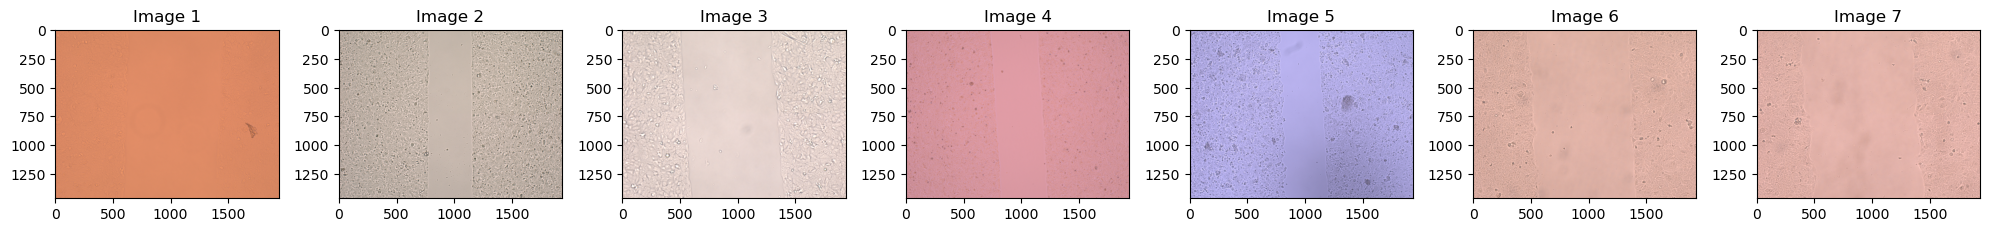

In [58]:
image_paths = glob.glob("images/*")
images = [io.imread(path) for path in image_paths[:7]] 

plt.figure(figsize=(20, 5)) 
for i, img in enumerate(images):
    plt.subplot(1, len(images), i + 1) 
    plt.imshow(img) 
    plt.title(f"Image {i + 1}") 

plt.tight_layout()
plt.show()

In [59]:
img=io.imread("images/8.png")

(1460, 1936, 3)

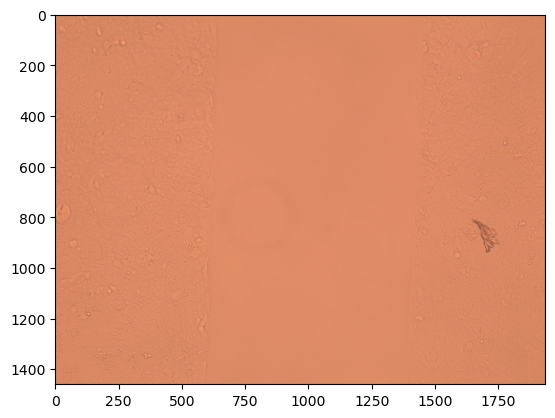

In [60]:
plt.imshow(img)
img.shape

In [61]:
if img.ndim == 3: 
    img = rgb2gray(img)

img = img_as_ubyte(img)


In [62]:
img.shape

(1460, 1936)

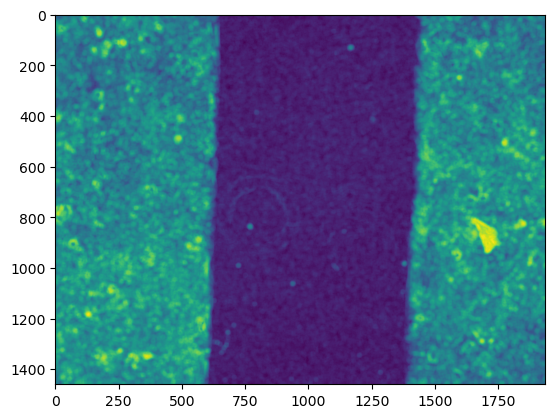

In [63]:
entropy_img = entropy(img, disk(10))
plt.imshow(entropy_img)

In [64]:
thresh = threshold_otsu(entropy_img)
print(thresh)

2.9115466006829624


In [65]:
binary = entropy_img <= thresh
print(binary)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ...  True  True False]
 [False False False ...  True  True False]]


1169725


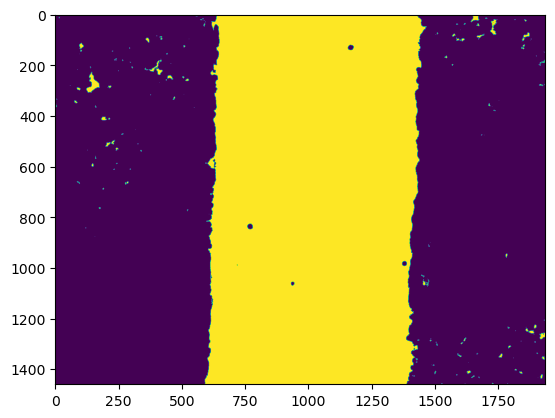

In [66]:
plt.imshow(binary)
scratch_area = np.sum(binary == 1)
print(scratch_area)

In [67]:

time = 0
time_list=[]
area_list=[]
path = "images/*.*"
for file in glob.glob(path):
    img=io.imread(file)
    if img.ndim == 3: 
        img = rgb2gray(img)
    img = img_as_ubyte(img)
    entropy_img = entropy(img, disk(3))
    thresh = threshold_otsu(entropy_img)
    binary = entropy_img <= thresh
    scratch_area = np.sum(binary == 1)
    print("time=", time, "hr  ", "Scratch area=", scratch_area, "pix\N{SUPERSCRIPT TWO}")
    time_list.append(time)
    area_list.append(scratch_area)
    time += 1

time= 0 hr   Scratch area= 1338219 pix²
time= 1 hr   Scratch area= 568516 pix²
time= 2 hr   Scratch area= 1292875 pix²
time= 3 hr   Scratch area= 639579 pix²
time= 4 hr   Scratch area= 532918 pix²
time= 5 hr   Scratch area= 1362513 pix²
time= 6 hr   Scratch area= 1463850 pix²
time= 7 hr   Scratch area= 1157901 pix²


y =  39484.48809523809 x  +  906350.6666666667
R² =  0.06007001438945453


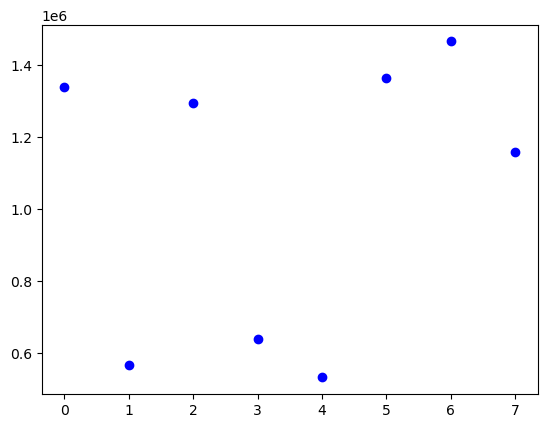

In [68]:
plt.plot(time_list, area_list, 'bo')


from scipy.stats import linregress



slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)
print("y = ",slope, "x", " + ", intercept  )
print("R\N{SUPERSCRIPT TWO} = ", r_value**2)